In [1]:
import numpy as np
import seaborn as sns # for plot styling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs # feature available in sklearn to create clusters of data set

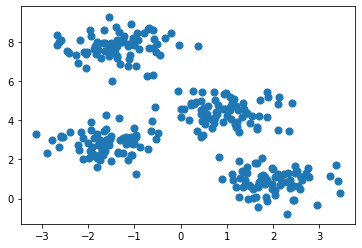

In [2]:
x,y = make_blobs(n_samples= 300, centers = 4, cluster_std = 0.60, random_state=0) 
#n_samples = The total number of points equally divided among clusters.
#centers = no of centroids or K=4
#cluster_std = cluster standard devition default is 1.0 and is a float value
#random_state is the random number generator
plt.scatter(x[:,0],x[:,1],s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4) # we are making an instance of KMeans and specify the value of K=4
kmeans.fit(x)# here we are calling the fit method
y_kmeans = kmeans.predict(x)# here we are passing the data for prediction


In [4]:
y_kmeans

array([3, 2, 0, 2, 3, 3, 1, 0, 2, 2, 1, 2, 0, 2, 3, 0, 0, 3, 1, 1, 3, 3,
       0, 1, 1, 0, 3, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 3, 0, 1, 0, 0,
       1, 1, 2, 1, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1, 2, 3, 2, 0, 2, 1, 1, 1,
       2, 3, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 3, 2, 3, 0, 3, 3, 2, 0, 3, 0,
       2, 2, 0, 3, 2, 1, 1, 0, 3, 3, 0, 1, 2, 3, 2, 3, 0, 3, 3, 0, 2, 0,
       1, 1, 3, 2, 3, 0, 2, 3, 3, 0, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       1, 3, 2, 1, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0,
       3, 1, 2, 1, 3, 0, 2, 0, 0, 3, 0, 1, 1, 0, 3, 0, 0, 2, 3, 0, 1, 2,
       3, 3, 0, 1, 3, 0, 1, 1, 0, 0, 0, 0, 3, 2, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 2, 0, 1, 3, 1, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 3, 3, 0,
       2, 3, 3, 1, 3, 1, 0, 2, 2, 0, 0, 2, 0, 3, 1, 0, 3, 1, 2, 1, 3, 0,
       3, 2, 2, 2, 2, 1, 1, 2, 0, 1, 3, 0, 1, 1, 1, 3, 3, 2, 0, 0, 1, 3,
       2, 1, 0, 2, 0, 3, 3, 1, 1, 0, 3, 3, 3, 0, 2, 2, 3, 3, 0, 3, 3, 3,
       2, 1, 2, 0, 3, 3, 2, 2, 2, 3, 3, 0, 2, 1])

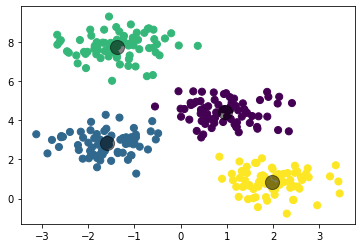

In [10]:
# implementation of algorithm
from sklearn.metrics import pairwise_distances_argmin # function in sklearn to calc dist b/w 2 pts.
def find_clusters (x,n_clusters,rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    centers = x[i]
    
    while True:
        labels = pairwise_distances_argmin(x, centers)# assign labels acc to the closest center
        
        new_centers = np.array([x[labels ==i].mean(0)# find new centers
                                 for i in range(n_clusters)])
        
        if np.all(centers==new_centers):
            break
        centers = new_centers
        
    return centers,labels
centers,labels = find_clusters(x,4)
plt.scatter(x[:,0],x[:,1],c=y_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:,0],centers[:,1],c= 'black',s=200,alpha=0.5)

            
                
        
    
    
    